<div style="border-radius:10px; padding: 30px; background-color: #ff69b4; font-size:90%; text-align:left">
<p style="font-family:Georgia; font-size:200%;font-weight:bold;text-align:center;color:navy;"> 🧑‍🤝‍🧑👫👭 Countries Clustering for United Nation Financial Assistance </p>
    
<p style="font-family:newtimeroman; font-size:180%;font-weight:bold;text-align:center;color:navy;"> 📉 Unsupervised Learning and Principle Component Analysis (PCA) 📈</p>
    
<p style="font-family:newtimeroman; font-size:200%;font-weight:bold;text-align:center;color:navy;">Coder : Sara Zahmatkesh 👩🏻‍🏫</p> </div> 


# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:100%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">1 - Libraries</p>

In [2]:
import pandas as pd                                 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import GridSearchCV
from scipy import linalg
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:100%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">2 - Importing Dataset</p>

In [3]:
data = pd.read_csv ('Country-data.csv') 
data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

## <p style=" font-family:roboto; color:babypink; font-size:85%; color:navy; text-align:left; padding: 0px">2.1 - <span style="color:navy;font-weight:bold">Data Information

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
Child morth = Death of children under 5 years of age per 1000 live births 

exports = exports of goods and services per capita. Given as % age of the GDP (Gross Domestic Products) per capita 

health = total health spending per capita. Given as % age of GDP per capita

imports = exports of goods and services per capita. Given as % age of the GDP per capita

income = Net income per person 

inflation = the measurement of the annual growth rate of the Total GDP 

life_expec = the average number of years a newborn child would live if the current mortality patterns are to remain the same 

total_fer = the number of children that would be born to each woman if the current_age fertility rates remain the same.

gdpp = the GDP per capita. calculated as the total GDP devided by the total population 



**The purpose is to cluster countries by considering these 9 features. This clustering could be then beneficial in United Nation's financial assistance.**


# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:100%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">3 - Preprocessing

In [4]:
df = pd.DataFrame (data)
df.describe ()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    There is no missing value in the dataset. Country column is object, showing the name of the country, which should be removed in processing and modeling. The rest columns look good to proceed. 

## <p style=" font-family:roboto; color:babypink; font-size:85%; color:navy; text-align:left; padding: 0px">3.1 - <span style="color:navy;font-weight:bold">Processing of Outliers 


Columns of data are continuous values. Therefore, gaussian mixture model should be a good algorithm. Assuming a normal distribution of data, the common approach is to remove values that are not within 3 standard deviations from the mean of the column.
    
    
**BUT**
    
**After doing that some countries wii be out of the clustering and their data will be lost.** 

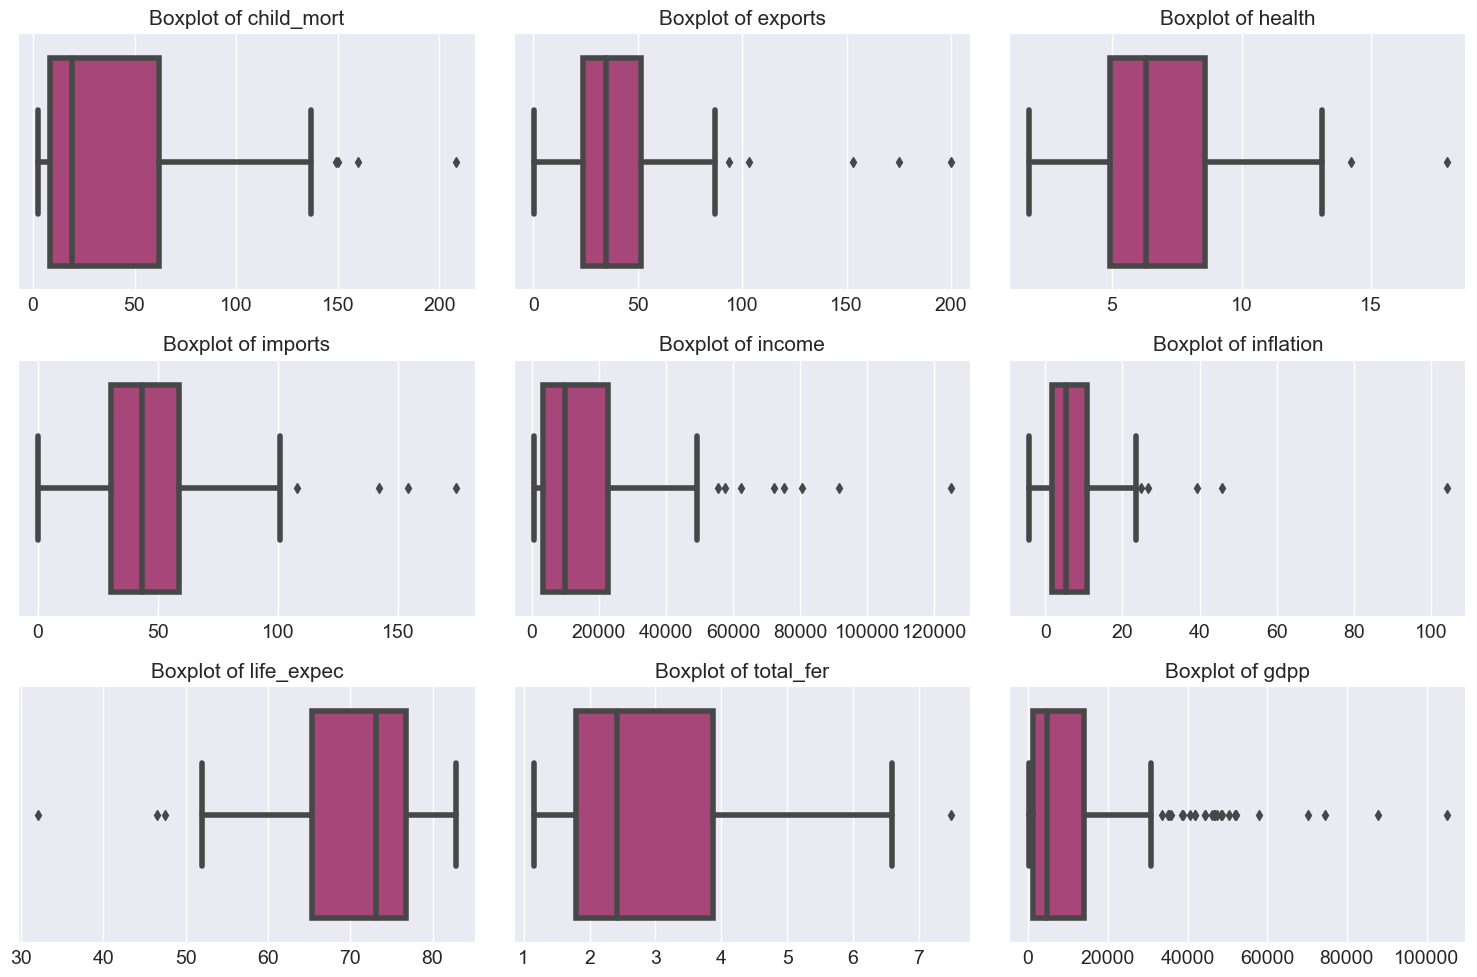

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ensure warnings are filtered appropriately
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the style for the plots
sns.set_style('darkgrid')

# List of columns to plot
list_of_columns = ['child_mort', 'exports', 'health', 
                   'imports', 'income', 'inflation', 
                   'life_expec', 'total_fer', 'gdpp']

# Create a figure with a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Loop through each column name and its corresponding axis
for i, column_name in enumerate(list_of_columns):
    
    # Plot a boxplot for each column
    sns.boxplot(data=df, x=column_name, palette='magma', ax=axs[i])
    
    # Set the title for each subplot
    axs[i].set_title(f'Boxplot of {column_name}', fontsize=15)
    axs[i].set_xlabel('')  # Optionally remove the x-axis label for a cleaner look

# Adjust layout so the plots fit nicely
plt.tight_layout()

# Display the plots
plt.show()

# Reset the warning filter to default
warnings.simplefilter(action='default', category=FutureWarning)


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
 There are several outliers in the data specially in gdpp. It is better to keep them to not lose data for any country.

In [95]:
# Filter to keep data within 6 sigma for all columns simultaneously
df1 = df.drop('country',axis=1)       # dropping the country column # keeping df1 as the original without dropping any country

mask = (np.abs(df1 - df1.mean()) <= (3 * df1.std())).all(axis=1)
df2 = df1[mask]
df2.describe()

child_mort     exports      health     imports        income  \
count  153.000000  153.000000  153.000000  153.000000    153.000000   
mean    37.224183   38.670582    6.774706   45.735725  14365.222222   
std     36.358238   20.352828    2.539936   19.143349  13406.165312   
min      2.600000    0.109000    1.970000    0.065900    609.000000   
25%      8.700000   23.800000    4.970000   30.900000   3340.000000   
50%     20.300000   35.000000    6.320000   43.300000   9920.000000   
75%     62.000000   50.600000    8.500000   58.600000  20400.000000   
max    150.000000  103.000000   14.200000  108.000000  57600.000000   

        inflation  life_expec   total_fer          gdpp  
count  153.000000  153.000000  153.000000    153.000000  
mean     7.024150   70.457516    2.956340  10589.379085  
std      6.949213    8.229230    1.477622  13945.393875  
min     -4.210000   46.500000    1.230000    231.000000  
25%      1.770000   65.300000    1.800000   1310.000000  
50%      5.140000   72.500000    2.480000   4540.000000  
75%     10.100000   76.500000    3.910000  12100.000000  
max     39.200000   82.800000    6.590000  58000.000000

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
If we remove the outliers, we will lose data for 14 countries. **So, we keep df1**

## <p style=" font-family:roboto; color:babypink; font-size:85%; color:navy; text-align:left; padding: 0px">3.2 - <span style="color:navy;font-weight:bold"> Normalizing


In [96]:
scaler = MinMaxScaler()
norm_array = scaler.fit_transform(df1)

# Convert the array back to a DataFrame
norm_df1 = pd.DataFrame(norm_array, columns=df1.columns)
norm_df1

child_mort   exports    health   imports    income  inflation  \
0      0.426485  0.049482  0.358608  0.257765  0.008047   0.126144   
1      0.068160  0.139531  0.294593  0.279037  0.074933   0.080399   
2      0.120253  0.191559  0.146675  0.180149  0.098809   0.187691   
3      0.566699  0.311125  0.064636  0.246266  0.042535   0.245911   
4      0.037488  0.227079  0.262275  0.338255  0.148652   0.052213   
..          ...       ...       ...       ...       ...        ...   
162    0.129503  0.232582  0.213797  0.302609  0.018820   0.063118   
163    0.070594  0.142032  0.192666  0.100809  0.127750   0.463081   
164    0.100779  0.359651  0.312617  0.460715  0.031200   0.150725   
165    0.261441  0.149536  0.209447  0.197397  0.031120   0.257000   
166    0.391918  0.184556  0.253574  0.177275  0.021473   0.168284   

     life_expec  total_fer      gdpp  
0      0.475345   0.736593  0.003073  
1      0.871795   0.078864  0.036833  
2      0.875740   0.274448  0.040365  
3      0.552268   0.790221  0.031488  
4      0.881657   0.154574  0.114242  
..          ...        ...       ...  
162    0.609467   0.370662  0.026143  
163    0.854043   0.208202  0.126650  
164    0.808679   0.126183  0.010299  
165    0.698225   0.555205  0.010299  
166    0.392505   0.670347  0.011731  

[167 rows x 9 columns]

# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:100%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">4 - Correlation </p>


Features have linear and nonlinear correlations to each other. All have normal distribution. To get better insights, correlation heatmap is plotted in the following. 

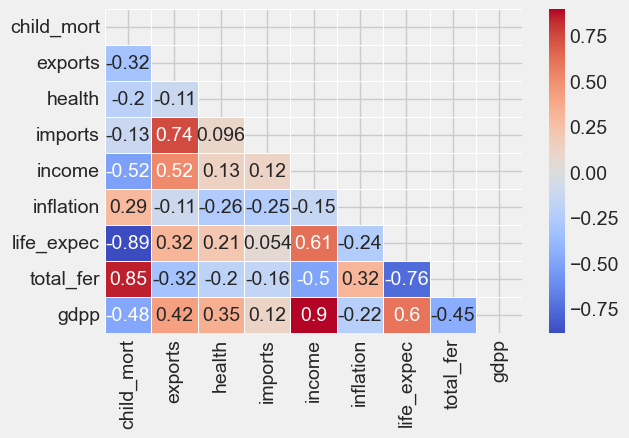

In [98]:
 plt.figure(figsize=(6,4))                 # correlation between features 
sns.heatmap(norm_df1.corr(numeric_only=True), annot=True,linewidth=.5,cmap="coolwarm",mask=np.triu(norm_df1.corr(numeric_only=True)));

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:100%; text-align:left">Tha maximum correlation is between gddp and income columns. These are two features for representative visulaization of clustering. BUT, PCA will assist in d-dimensional visulaization by decreasing the number of features. 

# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:100%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">5 - Principle Component Analysis </p>

**PCA** will be used to decrease the number of feature and decrease the dimension of the dataset. Number of components in PCA will be optimized by measuring the data variance, and optimum variance will yield the number of components.

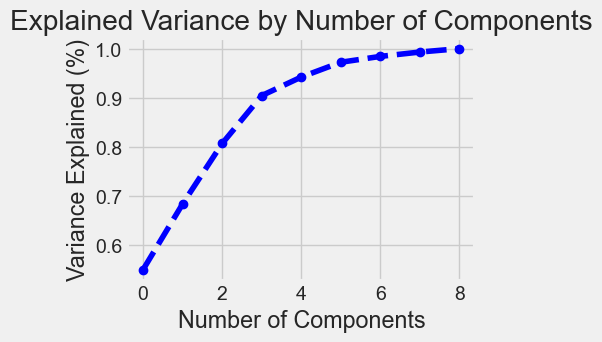

In [100]:

pca = PCA().fit(norm_df1)

# Calculate cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the Cumulative Summation of the Explained Variance
plt.figure(figsize=(4, 3))
plt.plot(explained_variance, marker='o', linestyle='--', color='b')

# Define the labels & title
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained (%)')
plt.title('Explained Variance by Number of Components')

# Display the plot with grid
plt.grid(True)
plt.show()



<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:100%; text-align:left">
    
Number of components seems to be suitable at 3, as it covers 90% of variance and reduced the number of features. 

In [101]:
print(norm_df1.isna().sum()) 

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [173]:
# 3 pca components and create a new dataset

df_pca = PCA(n_components=3).fit(norm_df1).transform(norm_df1)

# store it in a new data frame
df_pca= pd.DataFrame(data = df_pca, columns = ['principal component 1', 'principal component 2',
                                                        'principal component 3'])
df_pca.describe()

principal component 1  principal component 2  principal component 3
count           1.670000e+02           1.670000e+02           1.670000e+02
mean            5.251953e-17          -2.526256e-17           2.659217e-18
std             3.765716e-01           1.857663e-01           1.780871e-01
min            -8.363863e-01          -2.986136e-01          -6.016969e-01
25%            -2.616036e-01          -1.277896e-01          -1.217439e-01
50%             6.113319e-02          -1.982430e-02          -3.186981e-02
75%             2.548450e-01           8.400821e-02           1.052309e-01
max             9.412940e-01           1.036903e+00           7.328872e-01

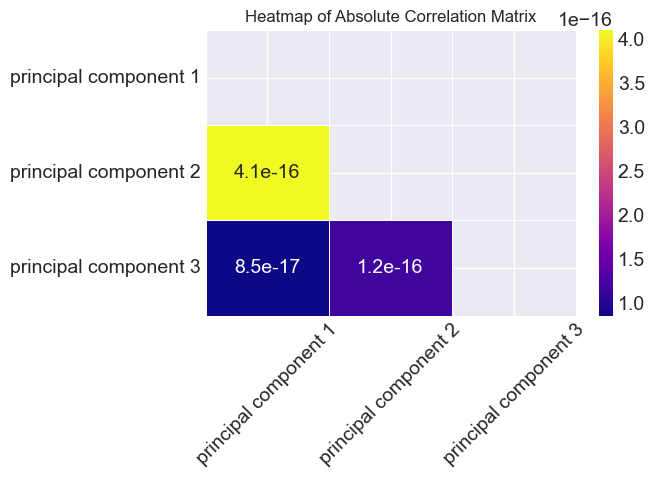

In [171]:
plt.figure(figsize=(7,5))                 # correlation between features 

correlation_matrix = df_pca.corr(numeric_only=True)

# Apply absolute values to the correlation matrix
abs_correlation_matrix = np.abs(correlation_matrix)

# Plot the heatmap
sns.heatmap(abs_correlation_matrix, annot=True, linewidth=.5, cmap="plasma", 
            mask=np.triu(abs_correlation_matrix))

# Set title and labels
plt.title('Heatmap of Absolute Correlation Matrix', fontsize = 12)
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:100%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">6 - K-Means clustering </p>

## <p style=" font-family:roboto; color:babypink; font-size:85%; color:navy; text-align:left; padding: 0px">6.1 - <span style="color:navy;font-weight:bold"> Elbow Method for Optimal K

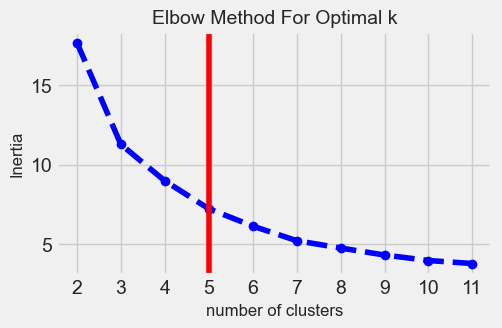

5

In [174]:
# K Means clustering on PCA components and loop pver number of clusters to maximize the inertia 

List = []
kmeans_set = {"init": "random", "n_init":10 , "max_iter": 300, "random_state": 0}

for k in range (2,12): 
    kmeans = KMeans (n_clusters = k , **kmeans_set)
    kmeans.fit (df_pca)
    List.append (kmeans.inertia_)
    
! pip install kneed  
from kneed import KneeLocator 
k1 = KneeLocator (range (2,12), List, curve = "convex", direction = "decreasing")

plt.style.use ("fivethirtyeight")
plt.figure(figsize=(5,3))  
plt.plot (range (2,12), List, marker='o', linestyle='--', color='b')
plt.xticks (range (2,12))
plt.axvline (x = k1.elbow, color = "r", label = "axvline-full height")
plt.xlabel ("number of clusters", fontsize = 12)
plt.ylabel ("Inertia", fontsize = 12)
plt.title("Elbow Method For Optimal k", fontsize = 14)
plt.show ()
k1.elbow

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
# Discussion: 
    

Optimal number of clusters is where is the "elbow" point, the point after which the distortion/inertia starts decreasing in a linear fashion. In our dataset, k=5 is the best number for clustering. 

## <p style=" font-family:roboto; color:babypink; font-size:85%; color:navy; text-align:left; padding: 0px">6.2 - <span style="color:navy;font-weight:bold"> Silouette Coefficient

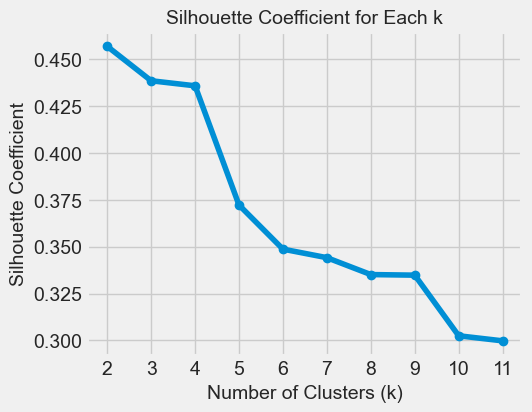

In [176]:
from sklearn.metrics import silhouette_score 

silhouette_coefficients = []

# Assuming 'norm_df' contains your normalized data
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_set)  # Replace **kmeans_set with your parameters
    kmeans.fit(df_pca)
    score = silhouette_score(df_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

# Plotting silhouette coefficients
plt.figure(figsize=(5, 4))  # Set the figure size before plotting
plt.plot(range(2, 12), silhouette_coefficients, marker='o')

plt.xlabel('Number of Clusters (k)', fontsize = 14)
plt.ylabel('Silhouette Coefficient', fontsize = 14)
plt.title('Silhouette Coefficient for Each k', fontsize = 14)
plt.xticks(range(2, 12))
plt.grid(True)
plt.show()

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
    
# Discussion: 
    
Based on the Silhouette Coefficient, **k=2** has better score. 
    


## <p style=" font-family:roboto; color:babypink; font-size:85%; color:navy; text-align:left; padding: 0px">6.2 - <span style="color:navy;font-weight:bold">  Calinski Harabasz Score

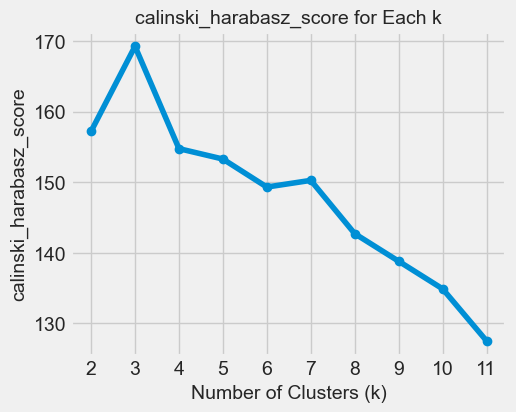

In [106]:
from sklearn.metrics import calinski_harabasz_score

CH_index = []

# Assuming 'norm_df' contains your normalized data
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_set)  # Replace **kmeans_set with your parameters
    kmeans.fit(df_pca)
    CH_score = calinski_harabasz_score(df_pca, kmeans.labels_)
    CH_index.append(CH_score)

# Plotting silhouette coefficients
plt.figure(figsize=(5, 4))  # Set the figure size before plotting
plt.plot(range(2, 12), CH_index, marker='o')

plt.xlabel('Number of Clusters (k)', fontsize = 14)
plt.ylabel('calinski_harabasz_score', fontsize = 14)
plt.title('calinski_harabasz_score for Each k', fontsize = 14)
plt.xticks(range(2, 12))
plt.grid(True)
plt.show()

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
# Discussion: 
    
**Based on the Silhouette Coefficient, Calinski Harabasz Score, and Inertia,  **k=3** is selected for the number of clusters.**

## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">6.3 - <span style="color:navy;font-weight:bold"> Optimized KMean algorithm


In [107]:
print(df_pca.isna().sum())

principal component 1    0
principal component 2    0
principal component 3    0
dtype: int64


In [108]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  167 non-null    float64
 1   principal component 2  167 non-null    float64
 2   principal component 3  167 non-null    float64
dtypes: float64(3)
memory usage: 4.0 KB


In [109]:

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, n_init='auto').fit(df_pca)
centroids = kmeans.cluster_centers_
print("Centroids:\n", centroids)

Centroids:
 [[-0.50242118  0.09786908  0.04722599]
 [ 0.07613398 -0.11121436 -0.07403952]
 [ 0.47325292  0.14464163  0.11985723]]


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:100%; text-align:left">
    
Cetroids of the three clusters are printed above. 

In [110]:
# Convert kmeans.labels_ to a DataFrame
labels_df = pd.DataFrame({"cluster": kmeans.labels_})

# Concatenate the PCA DataFrame with the labels DataFrame
cluster_df = pd.concat([df_pca.reset_index(drop=True), labels_df.reset_index(drop=True)], axis=1)

cluster_df

principal component 1  principal component 2  principal component 3  \
0                -0.599078               0.095490               0.157554   
1                 0.158474              -0.212092              -0.064189   
2                 0.003686              -0.135867              -0.134182   
3                -0.650235               0.275975              -0.142672   
4                 0.200711              -0.064662              -0.100715   
..                     ...                    ...                    ...   
162              -0.160078              -0.029625              -0.121910   
163               0.061133              -0.171339              -0.058586   
164               0.115512              -0.032034              -0.195243   
165              -0.332968              -0.019824              -0.029989   
166              -0.573897               0.108788               0.032552   

     cluster  
0          0  
1          1  
2          1  
3          0  
4          1  
..       ...  
162        1  
163        1  
164        1  
165        0  
166        0  

[167 rows x 4 columns]

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:100%; text-align:left">
    
Each datapoint (having three components) is now assigned to a cluster label, using KMeans clustering. 

## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">6.4 - <span style="color:navy;font-weight:bold"> Clustering Visualization 

**Clustering in PCA components**

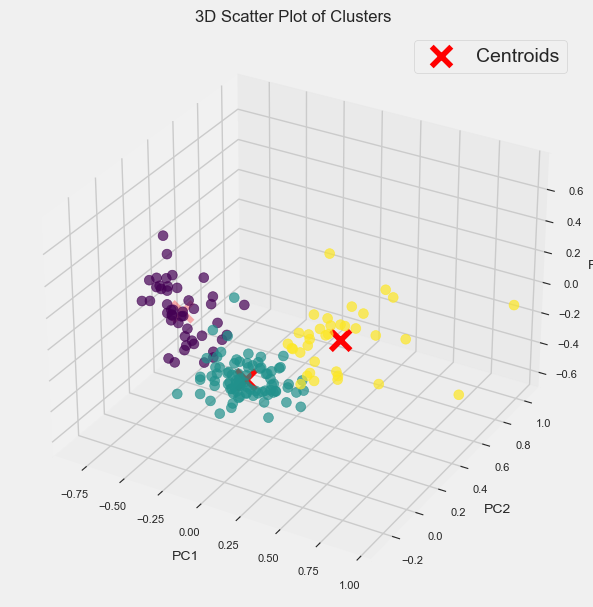

In [112]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    cluster_df['principal component 1'], 
    cluster_df['principal component 2'], 
    cluster_df['principal component 3'], 
    c=cluster_df['cluster'], 
    cmap='viridis',  # Choose a colormap, 'viridis' is just an example
    s=50, 
    alpha = 0.7 
)

# Plot centroids
ax.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    centroids[:, 2], 
    c='red', 
    s=200, 
    marker='x', 
    label='Centroids'
)

# Labels and title with reduced font size
ax.set_xlabel('PC1', fontsize=10)  # Reduce font size for x-axis label
ax.set_ylabel('PC2', fontsize=10)  # Reduce font size for y-axis label
ax.set_zlabel('PC3', fontsize=10)  # Reduce font size for z-axis label
ax.set_title('3D Scatter Plot of Clusters', fontsize=12)  # Title font size

# Reduce font size for tick labels
ax.tick_params(axis='x', labelsize=8)  # x-axis tick labels font size
ax.tick_params(axis='y', labelsize=8)  # y-axis tick labels font size
ax.tick_params(axis='z', labelsize=8)  # z-axis tick labels font size

# Show plot
plt.legend()
plt.show()



**Clustering in original dataset, having assigned cluster labels**

In [113]:

# Create a DataFrame for cluster labels
labels_df = pd.DataFrame({"cluster_KMeans": kmeans.labels_})

# Concatenate the original dataset (norm_df1) with the cluster labels
clustered_original_data = pd.concat([norm_df1.reset_index(drop=True), labels_df.reset_index(drop=True)], axis=1)

clustered_original_data


child_mort   exports    health   imports    income  inflation  \
0      0.426485  0.049482  0.358608  0.257765  0.008047   0.126144   
1      0.068160  0.139531  0.294593  0.279037  0.074933   0.080399   
2      0.120253  0.191559  0.146675  0.180149  0.098809   0.187691   
3      0.566699  0.311125  0.064636  0.246266  0.042535   0.245911   
4      0.037488  0.227079  0.262275  0.338255  0.148652   0.052213   
..          ...       ...       ...       ...       ...        ...   
162    0.129503  0.232582  0.213797  0.302609  0.018820   0.063118   
163    0.070594  0.142032  0.192666  0.100809  0.127750   0.463081   
164    0.100779  0.359651  0.312617  0.460715  0.031200   0.150725   
165    0.261441  0.149536  0.209447  0.197397  0.031120   0.257000   
166    0.391918  0.184556  0.253574  0.177275  0.021473   0.168284   

     life_expec  total_fer      gdpp  cluster_KMeans  
0      0.475345   0.736593  0.003073               0  
1      0.871795   0.078864  0.036833               1  
2      0.875740   0.274448  0.040365               1  
3      0.552268   0.790221  0.031488               0  
4      0.881657   0.154574  0.114242               1  
..          ...        ...       ...             ...  
162    0.609467   0.370662  0.026143               1  
163    0.854043   0.208202  0.126650               1  
164    0.808679   0.126183  0.010299               1  
165    0.698225   0.555205  0.010299               0  
166    0.392505   0.670347  0.011731               0  

[167 rows x 10 columns]

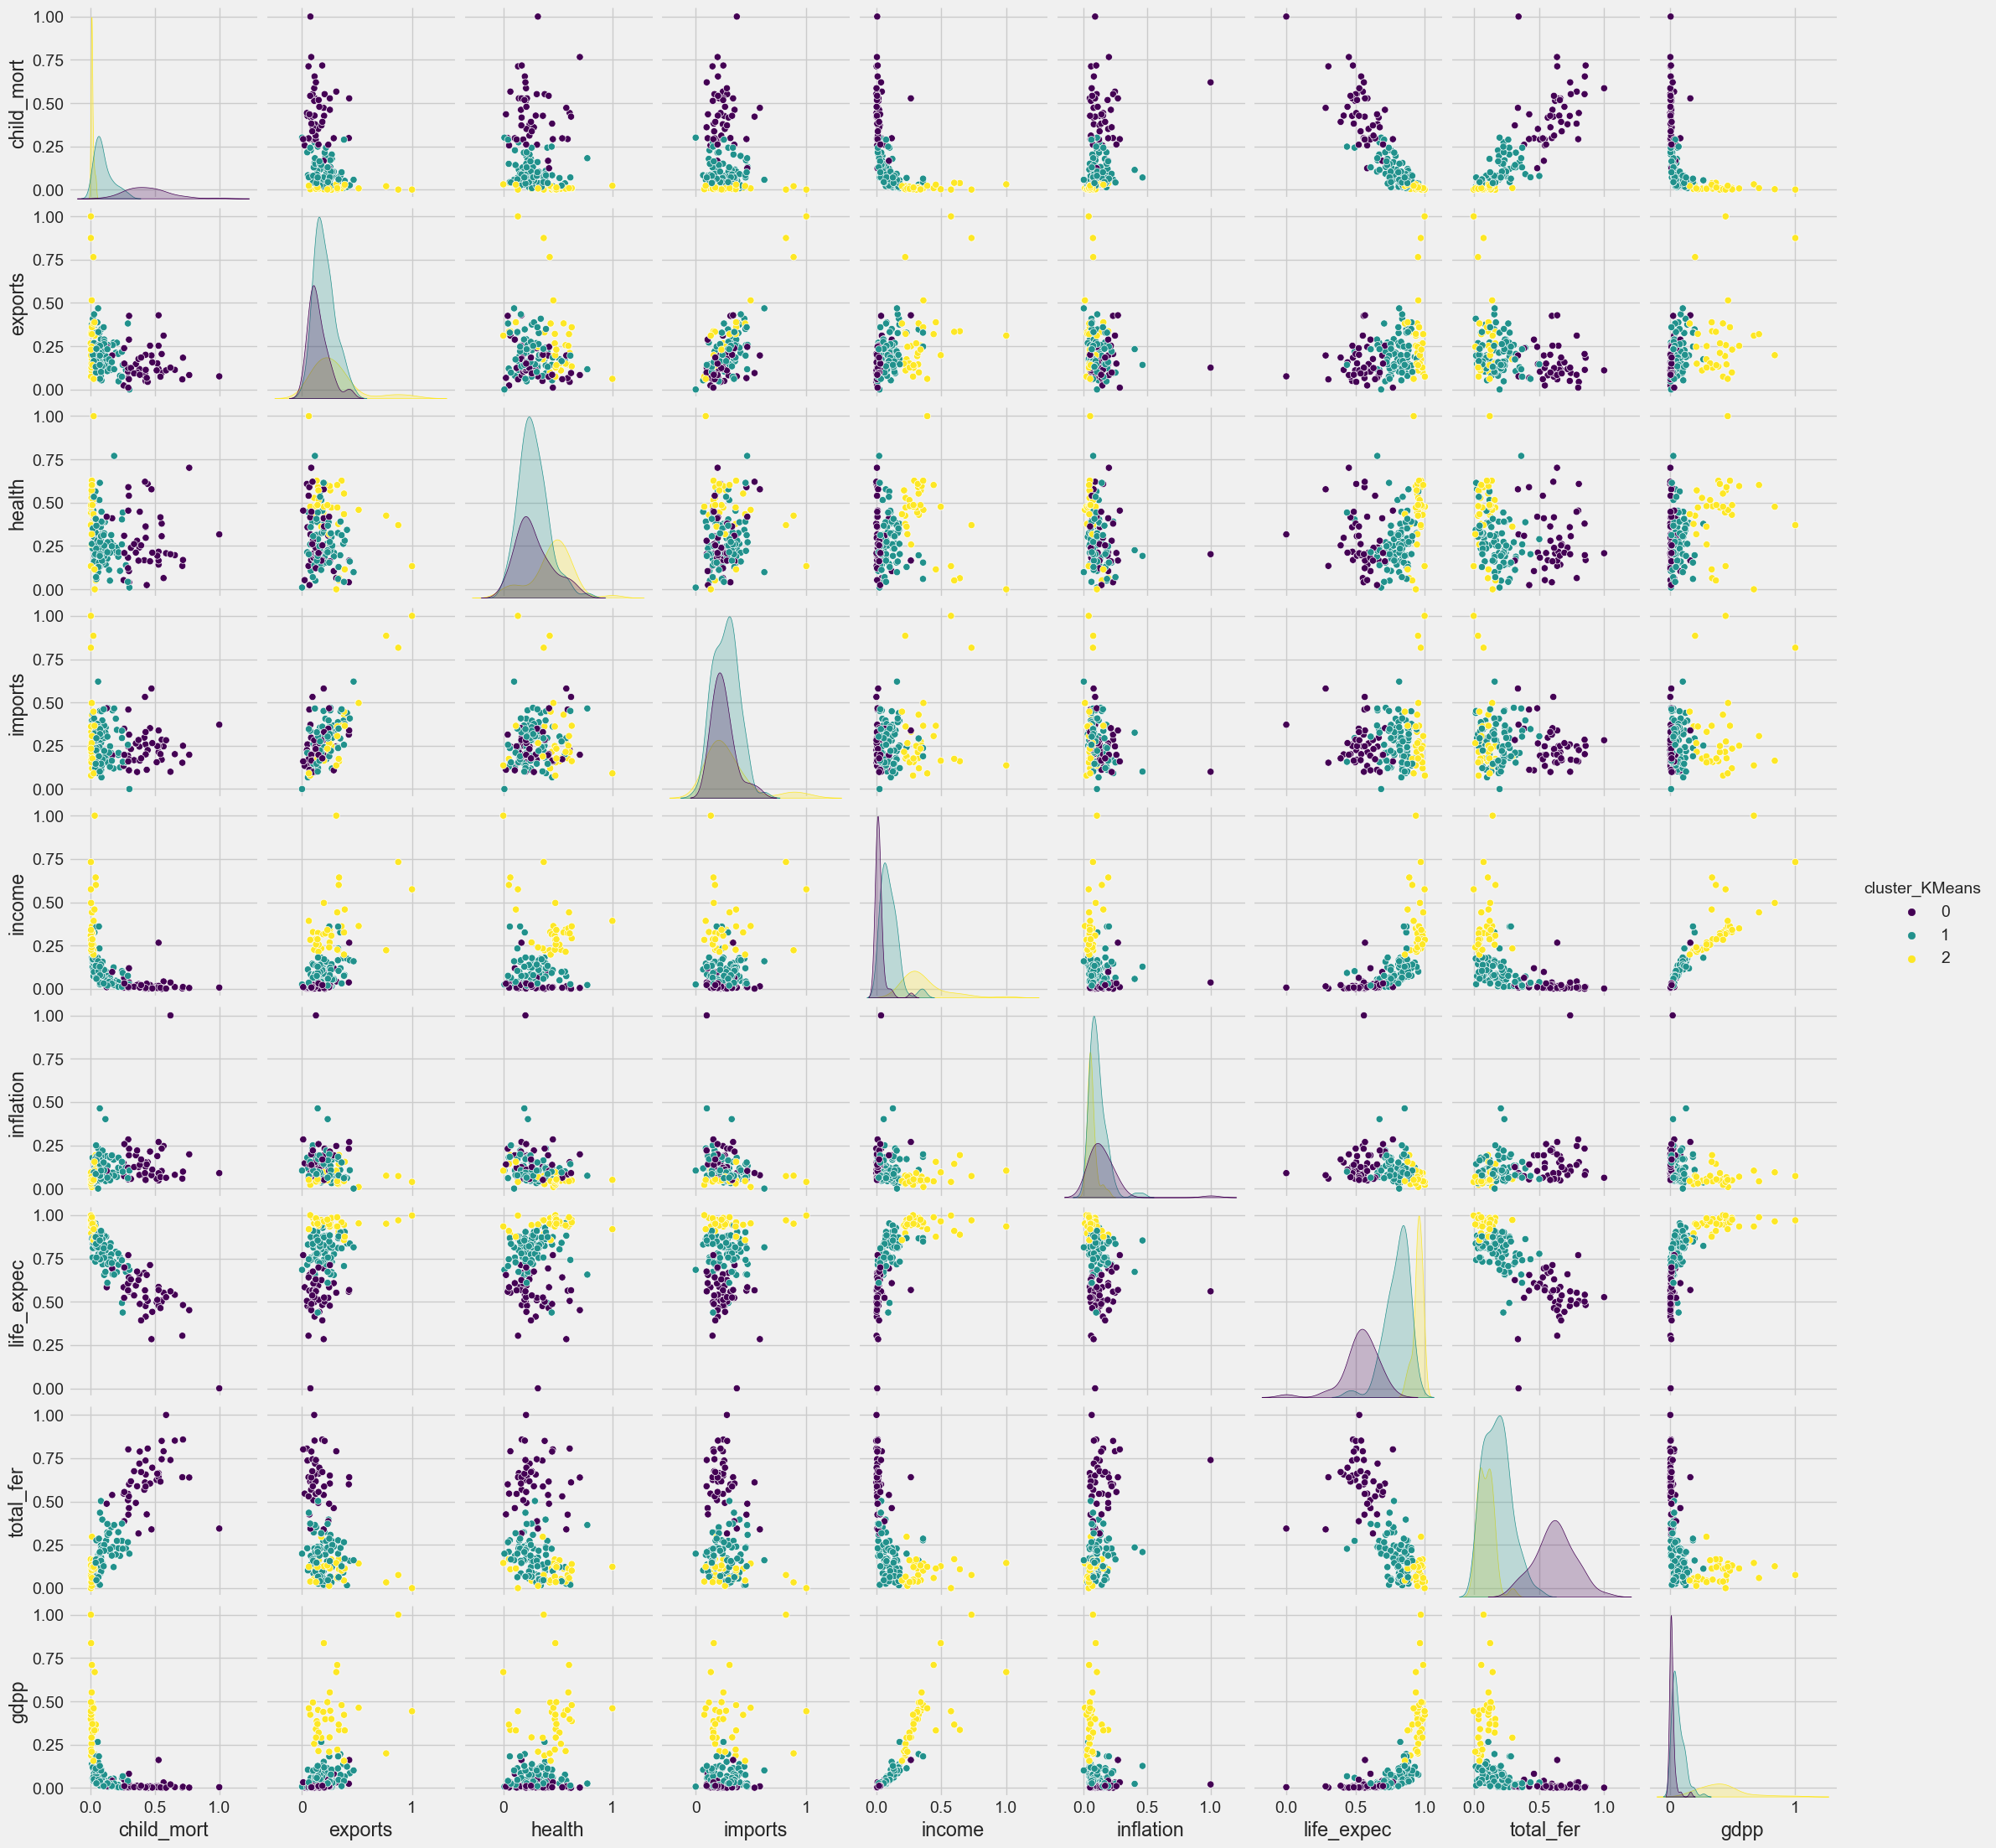

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot of the original features with cluster hue
sns.pairplot(clustered_original_data, hue="cluster_KMeans", palette="viridis", diag_kind="kde")
plt.show()


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:100%; text-align:left">
    
    
Based on KMeans clustering on 3 PCA components, countries are grouped in three. 
    
 **1- Developed Countries** 
    
 **2- Developing Countries**
    
 **3- Underdeveloped Countries**

# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:100%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">7 - Gaussian Mixture Model (GMM) Clustering </p>

The best number of components for the Gaussian Mixture Model (GMM), can be determined by **Bayesian Information Criterion (BIC)** or the **Akaike Information Criterion (AIC)**. 

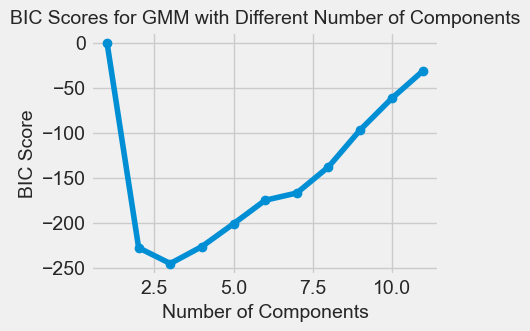

In [115]:
from sklearn.mixture import GaussianMixture

# Initialize variables to store the best model and corresponding BIC
best_gmm = None
lowest_bic = np.inf   # the positive infinity as the initial value to compare values and get the minimum value
bic_scores = []


# Evaluate different numbers of components
for n_components in range(1, 12):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(df_pca)
    
    bic = gmm.bic(df_pca)
    bic_scores.append(bic)
    
    if bic < lowest_bic:
        lowest_bic = bic
        best_gmm = gmm

# Plot BIC scores
plt.figure(figsize=(4, 3))
plt.plot(range(1, 12), bic_scores, marker='o')
plt.xlabel('Number of Components', fontsize = 14)
plt.ylabel('BIC Score', fontsize = 14)
plt.title('BIC Scores for GMM with Different Number of Components', fontsize = 14)
plt.show()



<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:100%; text-align:left">
    
**2 components yields the lowest BIC Score, showing the best clustering in GMM algorithm.**

In [116]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, df_pca):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(df_pca)


param_grid = {
    "n_components": range(2, 12),
    "covariance_type": ["spherical", "tied", "diag", "full"],}

grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score)

grid_search.fit(df_pca)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(2, 12)},
             scoring=<function gmm_bic_score at 0x000001335AB72C00>)

In [117]:
df_GMM_grid = pd.DataFrame(grid_search.cv_results_)[["param_n_components", "param_covariance_type", "mean_test_score"]]

df_GMM_grid["mean_test_score"] = -df_GMM_grid["mean_test_score"]
df_GMM_grid = df_GMM_grid.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df_GMM_grid.sort_values(by="BIC score").head()

Number of components Type of covariance  BIC score
30                    2               full  13.481092
1                     3          spherical  14.370234
0                     2          spherical  20.142468
2                     4          spherical  22.908300
10                    2               tied  26.576557

<div style="border-radius:10px; padding: 10px; background-color: #ffd8e6; font-size:70%; text-align:left">

# Based on BIC Score, and FridSerach results, n=2 and full covariance is the best: 

"full": each component has its own general covariance matrix.

"tied": all components share the same general covariance matrix.

"diag": each component has its own diagonal covariance matrix.

"spherical": each component has its own single variance.

## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">7.1 - <span style="color:navy;font-weight:bold"> Optimized GMM algorithm

In [118]:
# Define and fit the GMM model
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(df_pca)

# Predict the cluster labels for each data point
predict_gmm = gmm.predict(df_pca)

# Get the means (centroids) of the clusters
centroids = gmm.means_
print("Centroids (Means of the Gaussian Components):\n", centroids)


Centroids (Means of the Gaussian Components):
 [[-0.24636904 -0.01181874 -0.02020691]
 [ 0.3300686   0.01583395  0.02707185]]


In [119]:
# Predict the cluster labels using GMM
predict_gmm = gmm.predict(df_pca)

# Convert GMM predicted labels to a DataFrame
labels_df_gmm = pd.DataFrame({"cluster_gmm": predict_gmm})

# Concatenate the PCA DataFrame with the labels DataFrame
cluster_df = pd.concat([cluster_df.reset_index(drop=True), labels_df_gmm.reset_index(drop=True)], axis=1)
cluster_df


principal component 1  principal component 2  principal component 3  \
0                -0.599078               0.095490               0.157554   
1                 0.158474              -0.212092              -0.064189   
2                 0.003686              -0.135867              -0.134182   
3                -0.650235               0.275975              -0.142672   
4                 0.200711              -0.064662              -0.100715   
..                     ...                    ...                    ...   
162              -0.160078              -0.029625              -0.121910   
163               0.061133              -0.171339              -0.058586   
164               0.115512              -0.032034              -0.195243   
165              -0.332968              -0.019824              -0.029989   
166              -0.573897               0.108788               0.032552   

     cluster  cluster_gmm  
0          0            0  
1          1            1  
2          1            0  
3          0            0  
4          1            1  
..       ...          ...  
162        1            0  
163        1            0  
164        1            0  
165        0            0  
166        0            0  

[167 rows x 5 columns]

In [120]:
# Create a DataFrame for cluster labels
labels_df_gmm = pd.DataFrame({"cluster_gmm": predict_gmm})

# Concatenate the original dataset (norm_df1) with the GMM cluster labels
clustered_original_data = pd.concat([clustered_original_data.reset_index(drop=True), labels_df_gmm.reset_index(drop=True)], axis=1)

clustered_original_data


child_mort   exports    health   imports    income  inflation  \
0      0.426485  0.049482  0.358608  0.257765  0.008047   0.126144   
1      0.068160  0.139531  0.294593  0.279037  0.074933   0.080399   
2      0.120253  0.191559  0.146675  0.180149  0.098809   0.187691   
3      0.566699  0.311125  0.064636  0.246266  0.042535   0.245911   
4      0.037488  0.227079  0.262275  0.338255  0.148652   0.052213   
..          ...       ...       ...       ...       ...        ...   
162    0.129503  0.232582  0.213797  0.302609  0.018820   0.063118   
163    0.070594  0.142032  0.192666  0.100809  0.127750   0.463081   
164    0.100779  0.359651  0.312617  0.460715  0.031200   0.150725   
165    0.261441  0.149536  0.209447  0.197397  0.031120   0.257000   
166    0.391918  0.184556  0.253574  0.177275  0.021473   0.168284   

     life_expec  total_fer      gdpp  cluster_KMeans  cluster_gmm  
0      0.475345   0.736593  0.003073               0            0  
1      0.871795   0.078864  0.036833               1            1  
2      0.875740   0.274448  0.040365               1            0  
3      0.552268   0.790221  0.031488               0            0  
4      0.881657   0.154574  0.114242               1            1  
..          ...        ...       ...             ...          ...  
162    0.609467   0.370662  0.026143               1            0  
163    0.854043   0.208202  0.126650               1            0  
164    0.808679   0.126183  0.010299               1            0  
165    0.698225   0.555205  0.010299               0            0  
166    0.392505   0.670347  0.011731               0            0  

[167 rows x 11 columns]

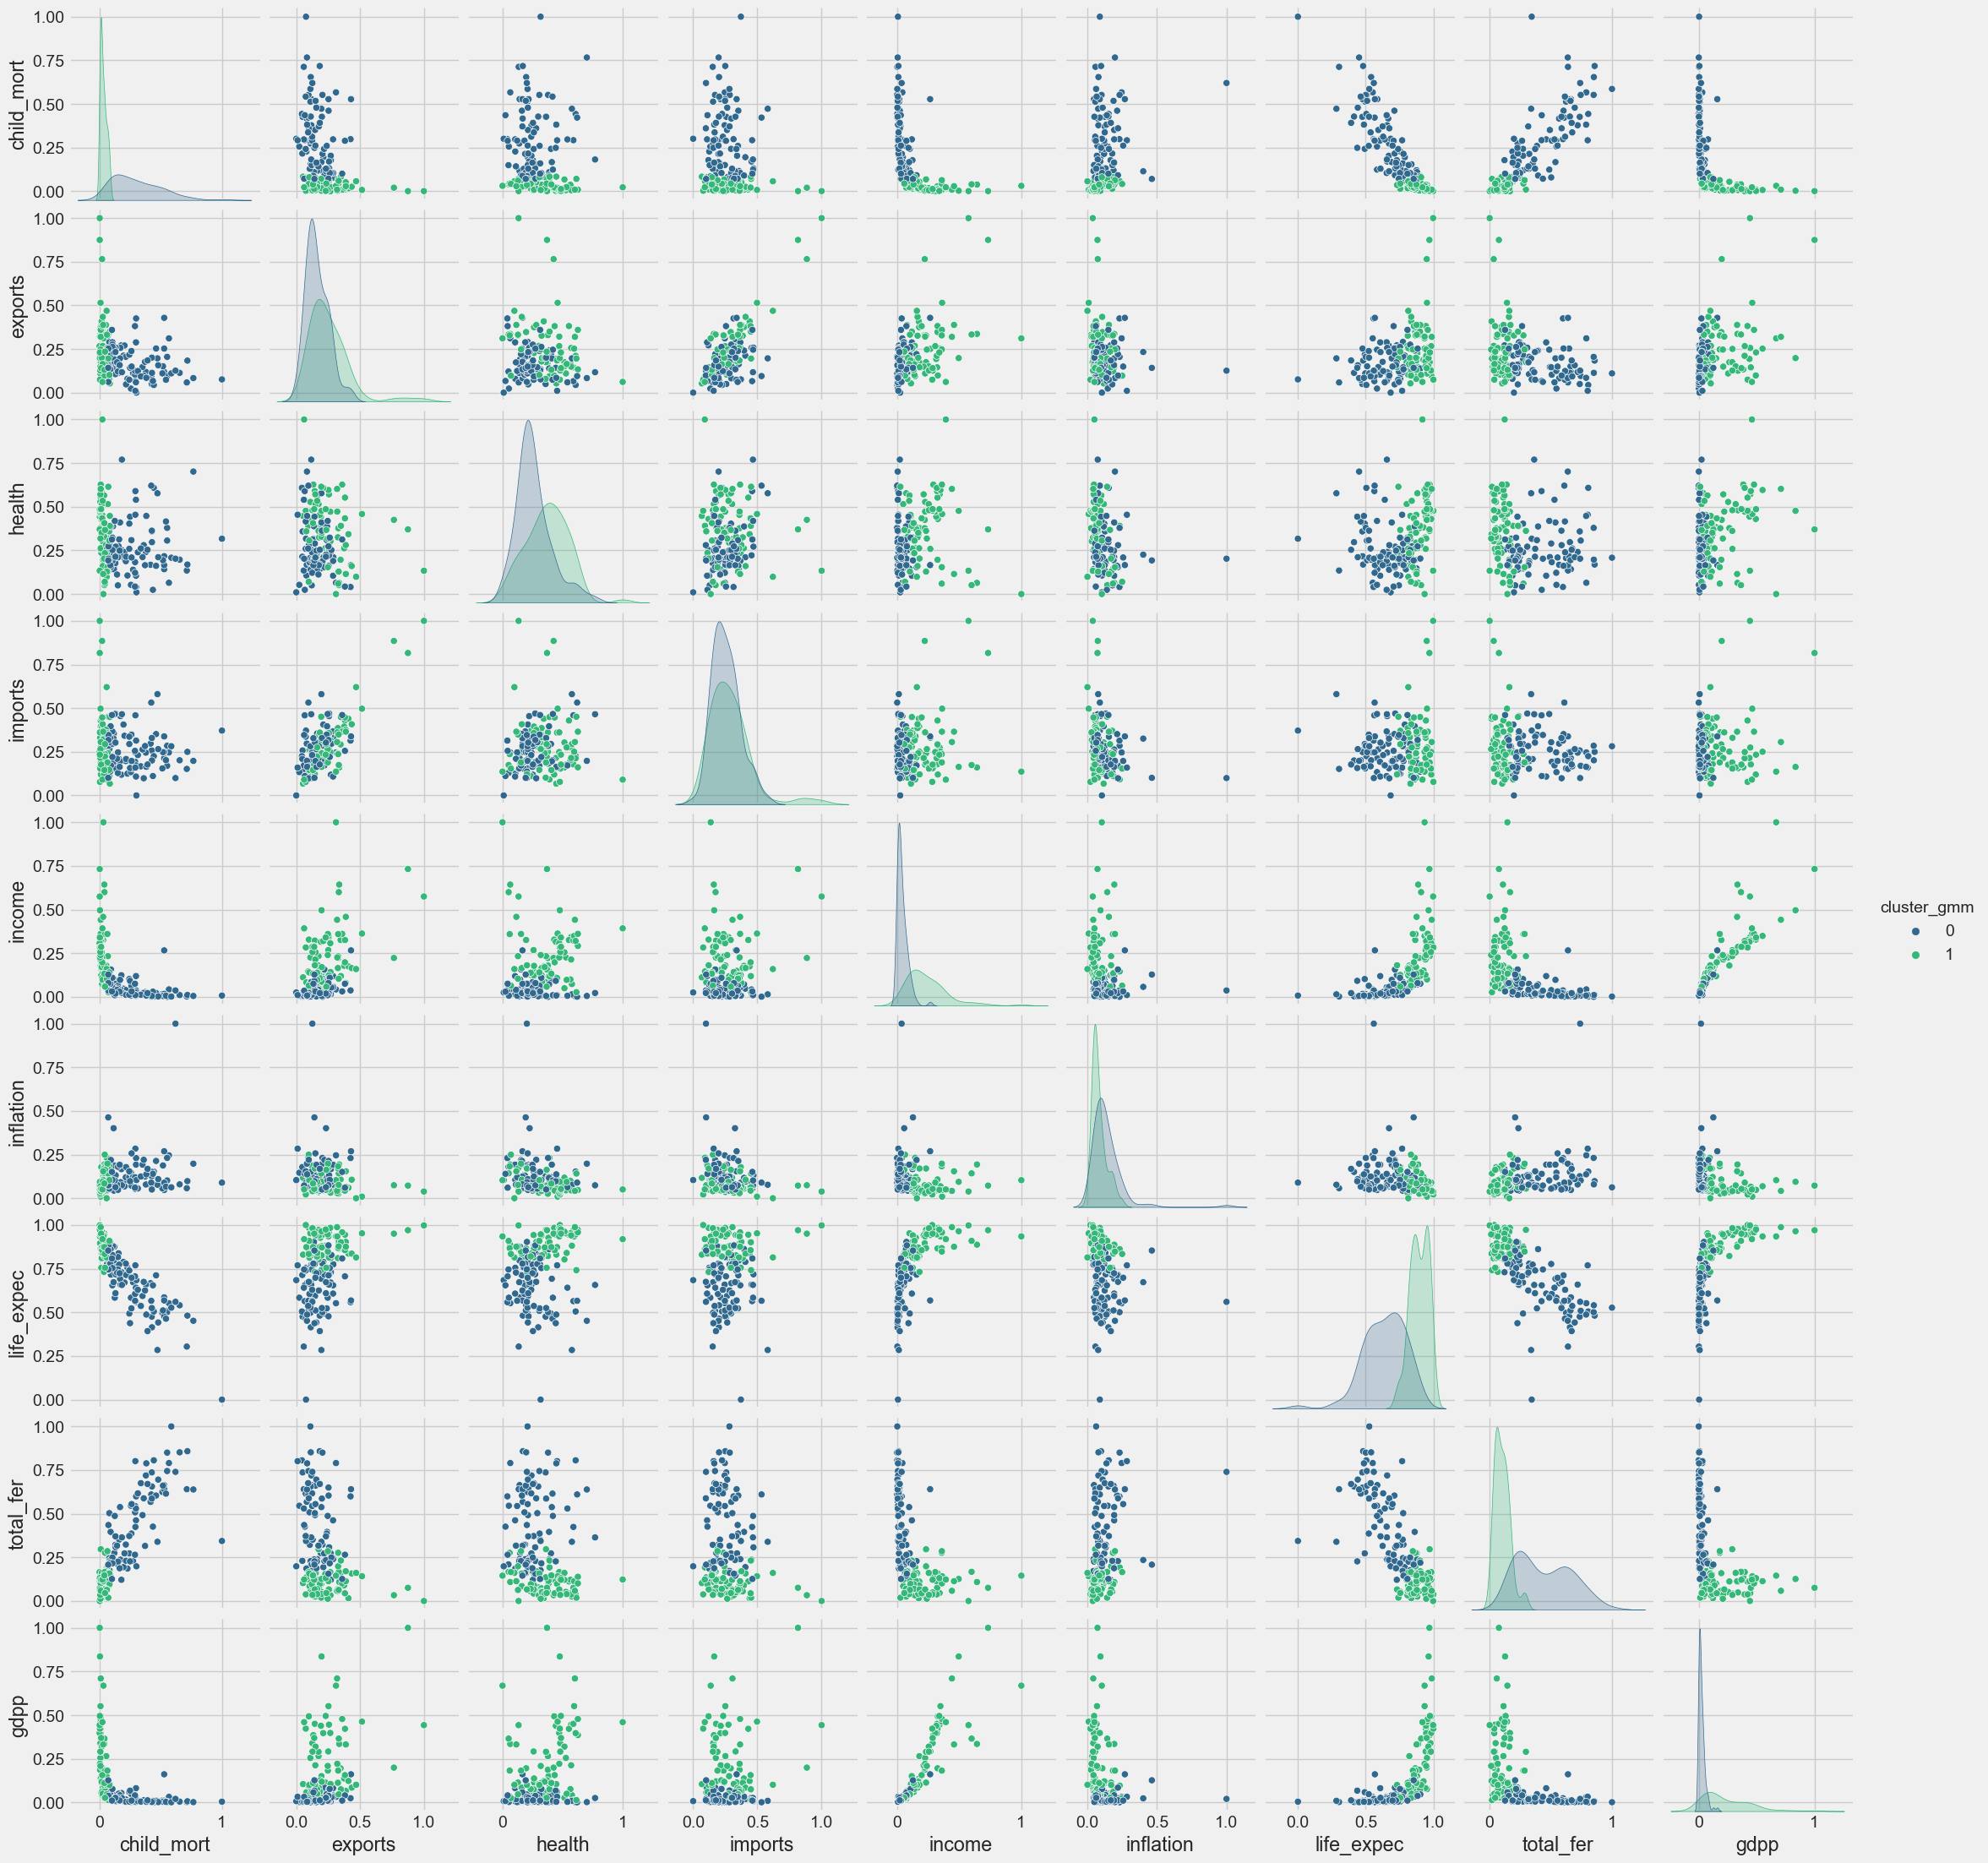

In [121]:
# Pairplot of the original features with cluster hue
clustered_original_data_gmm = clustered_original_data.drop(['cluster_KMeans'], axis=1)
sns.pairplot(clustered_original_data_gmm, hue="cluster_gmm", palette="viridis", diag_kind="kde")
plt.show()


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:100%; text-align:left">
    
    
Based on Gaussian Mixture Method of clustering on 3 PCA components, countries are grouped in two: 
    
 **1- Group 1: High GDP** 
    
 **2- Group 2: Low GDP**
    


# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:100%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">8 - Conclusion </p>

**Addition of the countries' name to the clustered labels:** 

In [122]:

clustered_original_data['country'] = df['country']

# Now the clustered DataFrame has the 'country' column along with cluster labels
clustered_original_data  # To check the first few rows


child_mort   exports    health   imports    income  inflation  \
0      0.426485  0.049482  0.358608  0.257765  0.008047   0.126144   
1      0.068160  0.139531  0.294593  0.279037  0.074933   0.080399   
2      0.120253  0.191559  0.146675  0.180149  0.098809   0.187691   
3      0.566699  0.311125  0.064636  0.246266  0.042535   0.245911   
4      0.037488  0.227079  0.262275  0.338255  0.148652   0.052213   
..          ...       ...       ...       ...       ...        ...   
162    0.129503  0.232582  0.213797  0.302609  0.018820   0.063118   
163    0.070594  0.142032  0.192666  0.100809  0.127750   0.463081   
164    0.100779  0.359651  0.312617  0.460715  0.031200   0.150725   
165    0.261441  0.149536  0.209447  0.197397  0.031120   0.257000   
166    0.391918  0.184556  0.253574  0.177275  0.021473   0.168284   

     life_expec  total_fer      gdpp  cluster_KMeans  cluster_gmm  \
0      0.475345   0.736593  0.003073               0            0   
1      0.871795   0.078864  0.036833               1            1   
2      0.875740   0.274448  0.040365               1            0   
3      0.552268   0.790221  0.031488               0            0   
4      0.881657   0.154574  0.114242               1            1   
..          ...        ...       ...             ...          ...   
162    0.609467   0.370662  0.026143               1            0   
163    0.854043   0.208202  0.126650               1            0   
164    0.808679   0.126183  0.010299               1            0   
165    0.698225   0.555205  0.010299               0            0   
166    0.392505   0.670347  0.011731               0            0   

                 country  
0            Afghanistan  
1                Albania  
2                Algeria  
3                 Angola  
4    Antigua and Barbuda  
..                   ...  
162              Vanuatu  
163            Venezuela  
164              Vietnam  
165                Yemen  
166               Zambia  

[167 rows x 12 columns]

## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">8.1 - <span style="color:navy;font-weight:bold">  countries' clustering world map based on KMeans

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:100%; text-align:left">
    After plotting the world map, I noticed some discrepancies between the country names in my dataset and those in the shapefile. As a result, some countries were not getting labeled correctly. I have reviewed these discrepancies and mapped the names in my dataset to those used in the world map shapefile.

In [160]:
matches = clustered_original_data[clustered_original_data['country'].str.contains('united states', case=False, na=False)]

print(matches)

     child_mort   exports  health  imports    income  inflation  life_expec  \
159    0.022882  0.061489     1.0  0.09046  0.392239    0.05018    0.919132   

     total_fer      gdpp  cluster_KMeans  cluster_gmm  \
159   0.123028  0.459764               2            1   

                      country  
159  United States of America  


In [146]:
pip install geopandas matplotlib

Note: you may need to restart the kernel to use updated packages.


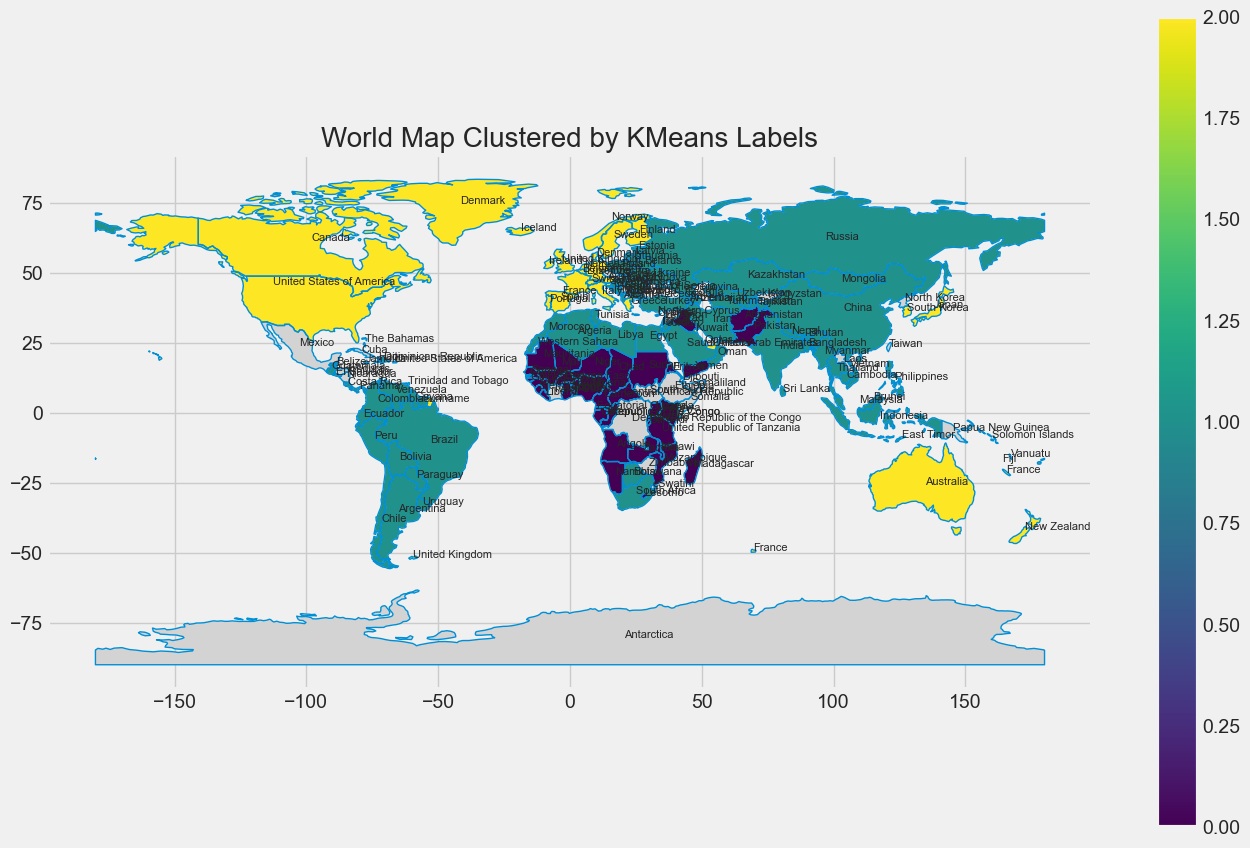

In [165]:

import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Define the path to the shapefile directory
shapefile_dir = '.'  # Assuming the shapefile is in the same directory as the notebook
shapefile_name = 'ne_110m_admin_0_countries'

# Check if all necessary files are present
for ext in ['shp', 'shx', 'dbf', 'prj']:
    file_path = os.path.join(shapefile_dir, f'{shapefile_name}.{ext}')
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f'Missing required file: {file_path}')

# Load the world map shapefile
world = gpd.read_file(os.path.join(shapefile_dir, f'{shapefile_name}.shp'))

# Merge the world data with your cluster labels and country names
# Assuming clustered_original_data_gmm has columns ['country', 'cluster_gmm']
# Ensure that the 'country' column name aligns with the world dataset ('name' in world data)

# Create a mapping of your dataset country names to the full names in the world DataFrame
name_mapping = {
    'United States': 'United States of America',
    'Tanzania': 'United Republic of Tanzania',
    'Congo, Dem. Rep.': 'Republic of the Congo',
    'Congo, Rep.': 'Republic of the Congo',
    'Equatorial Guinea': 'Equatorial Guinea',
    'Guinea': 'Guinea',
    'Guinea-Bissau': 'Guinea-Bissau'

}

# Apply the mapping to your dataset
clustered_original_data['country'] = clustered_original_data['country'].map(name_mapping).fillna(clustered_original_data['country'])


merged_data = world.merge(clustered_original_data, left_on='SOVEREIGNT', right_on='country', how='left')

# Plot the world map with clusters as hue
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the merged data
merged_data.boundary.plot(ax=ax, linewidth=1)
merged_data.plot(column='cluster_KMeans', cmap='viridis', legend=True, ax=ax, missing_kwds={'color': 'lightgrey'})

# Add labels for country names
for x, y, label in zip(merged_data.geometry.centroid.x, 
                       merged_data.geometry.centroid.y, 
                       merged_data['SOVEREIGNT']):
    ax.text(x, y, label, fontsize=8)

# Set the title and show the plot
ax.set_title('World Map Clustered by KMeans Labels', fontsize=20)

plt.savefig('plot.png', bbox_inches='tight')  # Save the plot
plt.close()  # Close the plot

from IPython.display import Image
Image(filename='plot.png')

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:100%; text-align:left">

    
**The gray countries were not concluded in the dataset**

 Search for countries' names in World file 

In [154]:

matches = world[world['SOVEREIGNT'].str.contains('Guinea', case=False, na=False)]

print(matches)

         featurecla  scalerank  LABELRANK         SOVEREIGNT SOV_A3  ADM0_DIF  \
7   Admin-0 country          1          2   Papua New Guinea    PNG         0   
61  Admin-0 country          1          3             Guinea    GIN         0   
62  Admin-0 country          1          6      Guinea-Bissau    GNB         0   
69  Admin-0 country          1          4  Equatorial Guinea    GNQ         0   

    LEVEL               TYPE TLC              ADMIN  ... FCLASS_TR  FCLASS_ID  \
7       2  Sovereign country   1   Papua New Guinea  ...      None       None   
61      2  Sovereign country   1             Guinea  ...      None       None   
62      2  Sovereign country   1      Guinea-Bissau  ...      None       None   
69      2  Sovereign country   1  Equatorial Guinea  ...      None       None   

   FCLASS_PL FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
7       None      None       None      None      None       None      None   
61      None      None       Non

## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">8.2 - <span style="color:navy;font-weight:bold">  countries' clustering world map based on GMM 

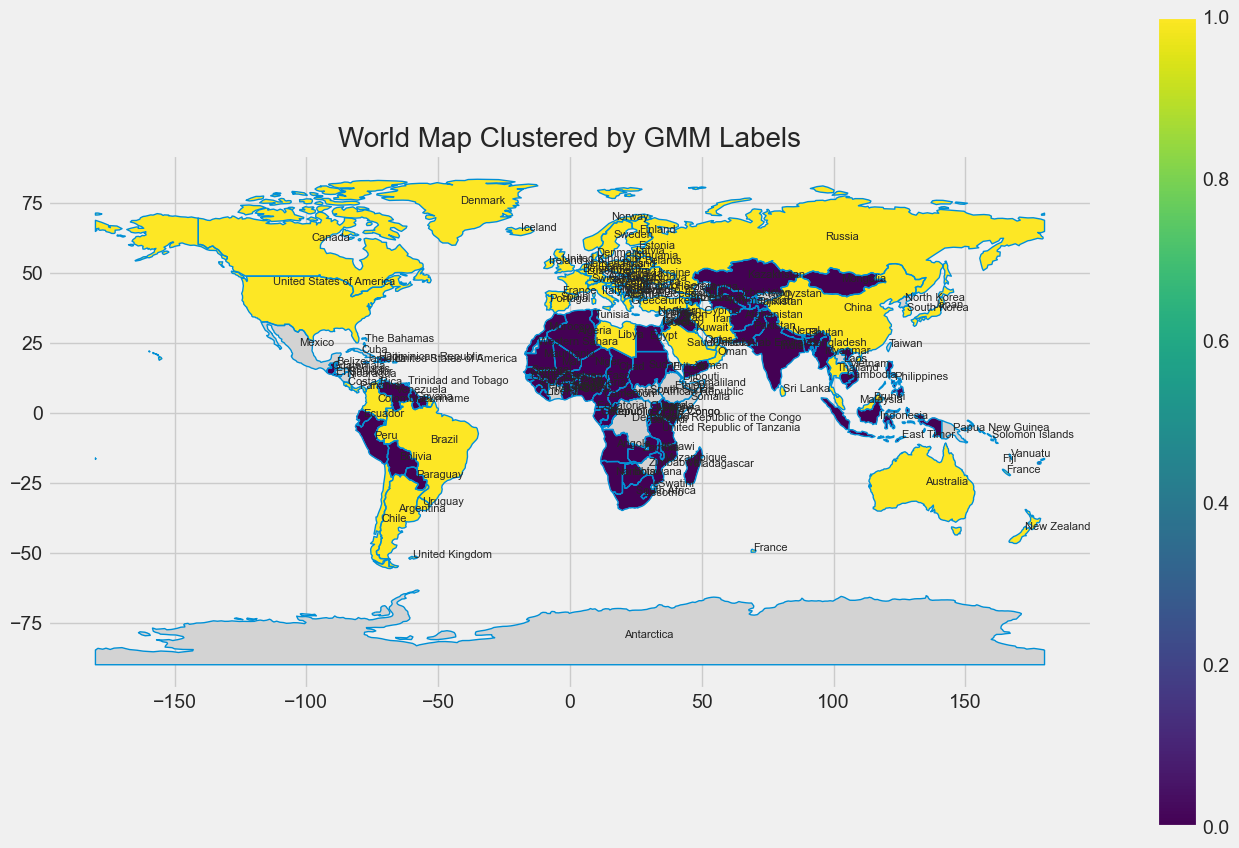

In [166]:

# Define the path to the shapefile directory
shapefile_dir = '.'  # Assuming the shapefile is in the same directory as the notebook
shapefile_name = 'ne_110m_admin_0_countries'

# Check if all necessary files are present
for ext in ['shp', 'shx', 'dbf', 'prj']:
    file_path = os.path.join(shapefile_dir, f'{shapefile_name}.{ext}')
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f'Missing required file: {file_path}')

# Load the world map shapefile
world = gpd.read_file(os.path.join(shapefile_dir, f'{shapefile_name}.shp'))


# Create a mapping of dataset country names to the full names in the world DataFrame
name_mapping = {
    'United States': 'United States of America',
    'Tanzania': 'United Republic of Tanzania',
    'Congo, Dem. Rep.': 'Republic of the Congo',
    'Congo, Rep.': 'Republic of the Congo',
    'Equatorial Guinea': 'Equatorial Guinea',
    'Guinea': 'Guinea',
    'Guinea-Bissau': 'Guinea-Bissau'

}

# Apply the mapping to your dataset
clustered_original_data['country'] = clustered_original_data['country'].map(name_mapping).fillna(clustered_original_data['country'])


merged_data = world.merge(clustered_original_data, left_on='SOVEREIGNT', right_on='country', how='left')

# Plot the world map with clusters as hue
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the merged data
merged_data.boundary.plot(ax=ax, linewidth=1)
merged_data.plot(column='cluster_gmm', cmap='viridis', legend=True, ax=ax, missing_kwds={'color': 'lightgrey'})

# Add labels for country names
for x, y, label in zip(merged_data.geometry.centroid.x, 
                       merged_data.geometry.centroid.y, 
                       merged_data['SOVEREIGNT']):
    ax.text(x, y, label, fontsize=8)

# Set the title and show the plot
ax.set_title('World Map Clustered by GMM Labels', fontsize=20)

plt.savefig('plot_gmm.png', bbox_inches='tight')  # Save the plot
plt.close()  # Close the plot

from IPython.display import Image
Image(filename='plot_gmm.png')